In [1]:
import torchvision.datasets as datasets
from augmentations import *
from PIL import Image as pil_image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cifar10_raw = datasets.cifar.CIFAR10("../cifar10", train=False, download=True)
idx_to_class = {v: k for k, v in cifar10_raw.class_to_idx.items()}

Files already downloaded and verified


In [3]:
sample, label = cifar10_raw[1]

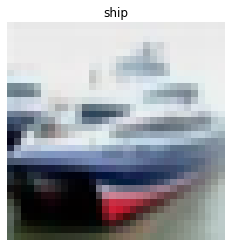

In [4]:
fig, ax = plt.subplots()
ax.imshow(sample)
ax.axis("off")
ax.set_title(idx_to_class[label])
plt.show()

In [5]:
set_of_augmentation_operations = [ShearX, ShearY, TranslateX, TranslateY,
                                  Rotate, AutoContrast, Invert, Equalize,
                                  Solarize, Posterize, Contrast, Color,
                                  Brightness, Sharpness, Cutout, SamplePairing]
# not including Sample-Paring atm

Files already downloaded and verified


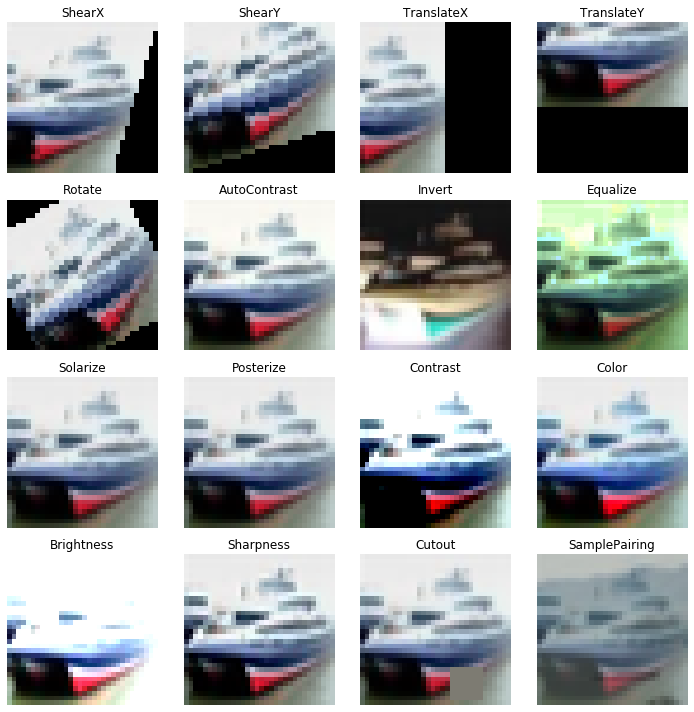

In [6]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
for idx, aug in enumerate(set_of_augmentation_operations):
    row_num = idx // 4
    col_num = idx % 4
    aug_sample = aug(1, 1)(sample)
    ax[row_num, col_num].imshow(aug_sample)
    ax[row_num, col_num].axis("off")
    ax[row_num, col_num].set_title(aug.__name__)

plt.tight_layout()
plt.show()


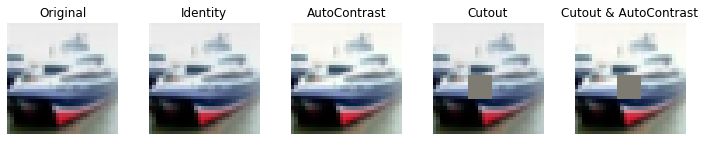

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2))
ax[0].imshow(sample)
ax[0].set_title("Original")
ax[0].axis("off")
ax_idx = 1
for idx, prob_i in enumerate([0, 1]):
    for jdx, prob_j in enumerate([0, 1]):
        aug_sample = Cutout(prob_i, 1)(AutoContrast(prob_j, 1)(sample))
        ax[ax_idx].imshow(aug_sample)
        
        aug_title = []
        if prob_i == 1:
            aug_title.append("Cutout")
        if prob_j == 1:
            aug_title.append("AutoContrast")
        if aug_title:
            aug_title = " & ".join(aug_title)
        else:
            aug_title = 'Identity'
        ax[ax_idx].set_title(aug_title)
        ax[ax_idx].axis("off")
        ax_idx += 1

plt.tight_layout()
plt.show()